In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/valentyn/Desktop/facebook_ads_data (2.0).csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB
None


In [6]:
df["ad_date"] = pd.to_datetime(df["ad_date"])

In [7]:
df_2021 = df[(df["ad_date"] >= "2021-01-01") & (df["ad_date"] < "2022-01-01")]

In [8]:
print(df_2021["ad_date"].min(), df_2021["ad_date"].max())
print(df_2021.shape)   #перевірка 

2021-01-01 00:00:00 2021-12-31 00:00:00
(1167, 10)


In [9]:
daily_spend = df_2021.groupby("ad_date")["total_spend"].sum()

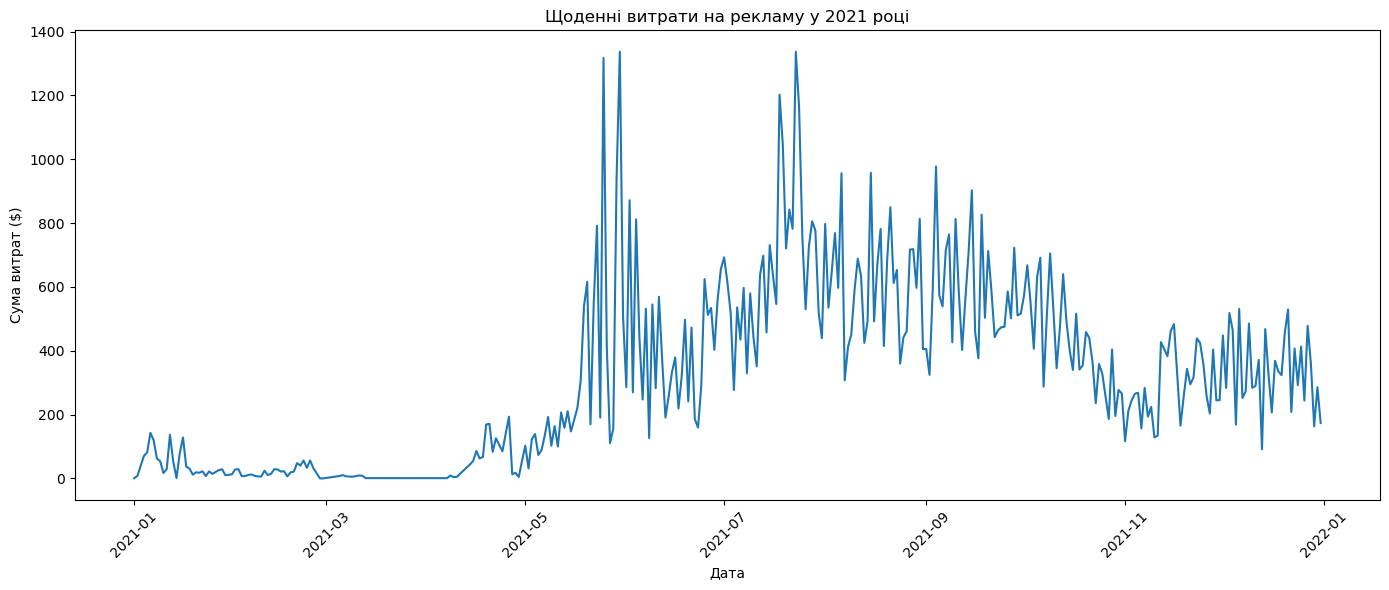

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_spend.index, y=daily_spend.values)
plt.title("Щоденні витрати на рекламу у 2021 році")
plt.xlabel("Дата")
plt.ylabel("Сума витрат ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
daily_romi = df_2021.groupby("ad_date")["romi"].mean()

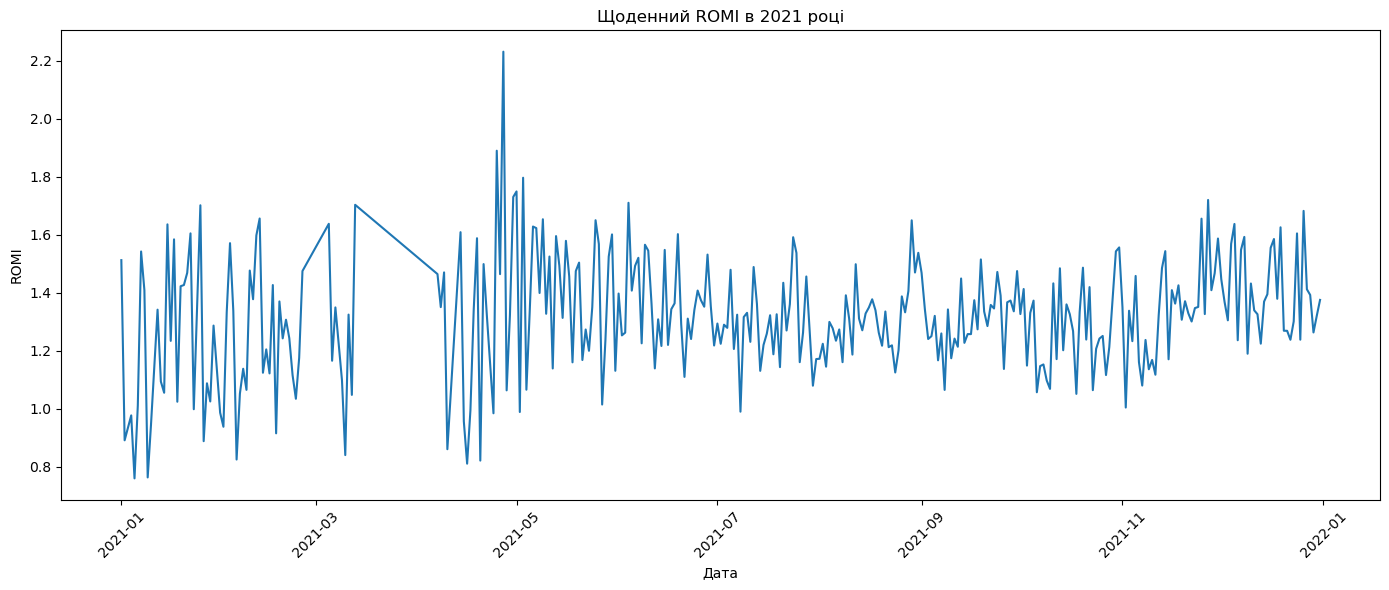

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_romi.index, y=daily_romi.values)
plt.title("Щоденний ROMI в 2021 році")
plt.xlabel("Дата")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Бонусне завдання 

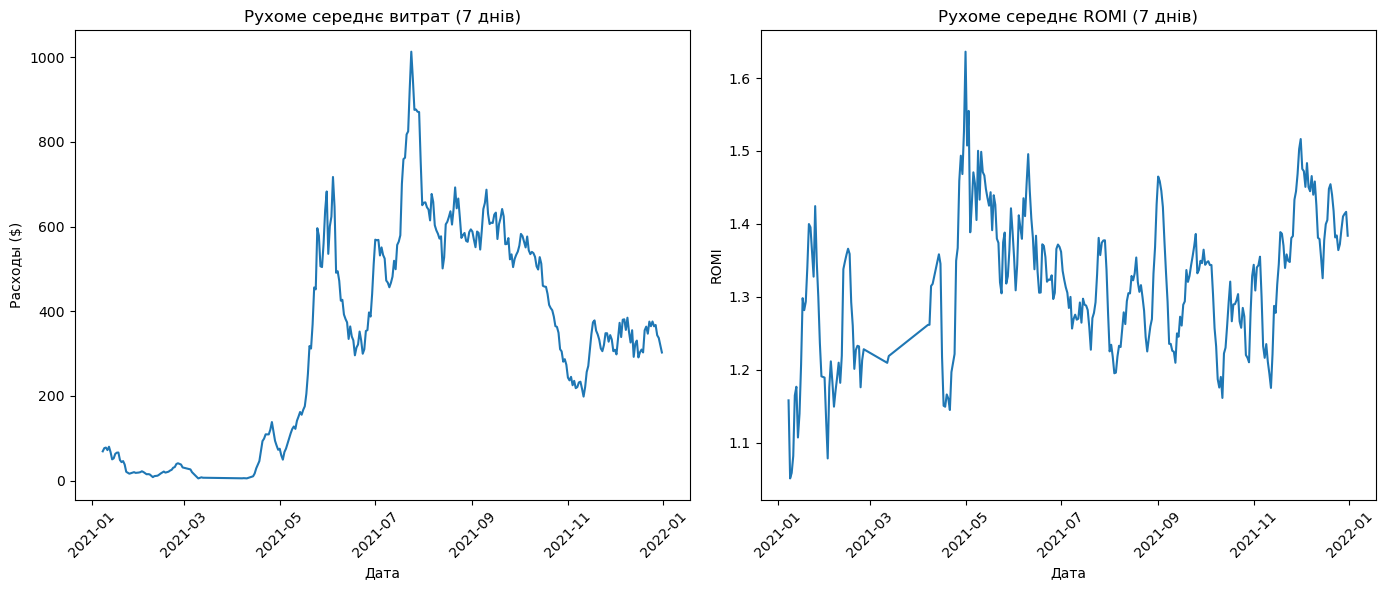

In [23]:
# Скользящее среднее по 7 дням
spend_rolling = daily_spend.rolling(window=7).mean()
romi_rolling = daily_romi.rolling(window=7).mean()

# Построим два графика рядом
plt.figure(figsize=(14, 6))

# График скользящего среднего расходов
plt.subplot(1, 2, 1)
sns.lineplot(x=spend_rolling.index, y=spend_rolling.values)
plt.title("Рухоме середнє витрат (7 днів)")
plt.xlabel("Дата")
plt.ylabel("Расходы ($)")
plt.xticks(rotation=45)

# График скользящего среднего ROMI
plt.subplot(1, 2, 2)
sns.lineplot(x=romi_rolling.index, y=romi_rolling.values)
plt.title("Рухоме середнє ROMI (7 днів)")
plt.xlabel("Дата")
plt.ylabel("ROMI")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/var/folders/t2/1gfghcq52p70wb1hs0l_jszr0000gn/T/ipykernel_1332/4047735851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spend_by_campaign.values, y=spend_by_campaign.index, palette="Blues_d")


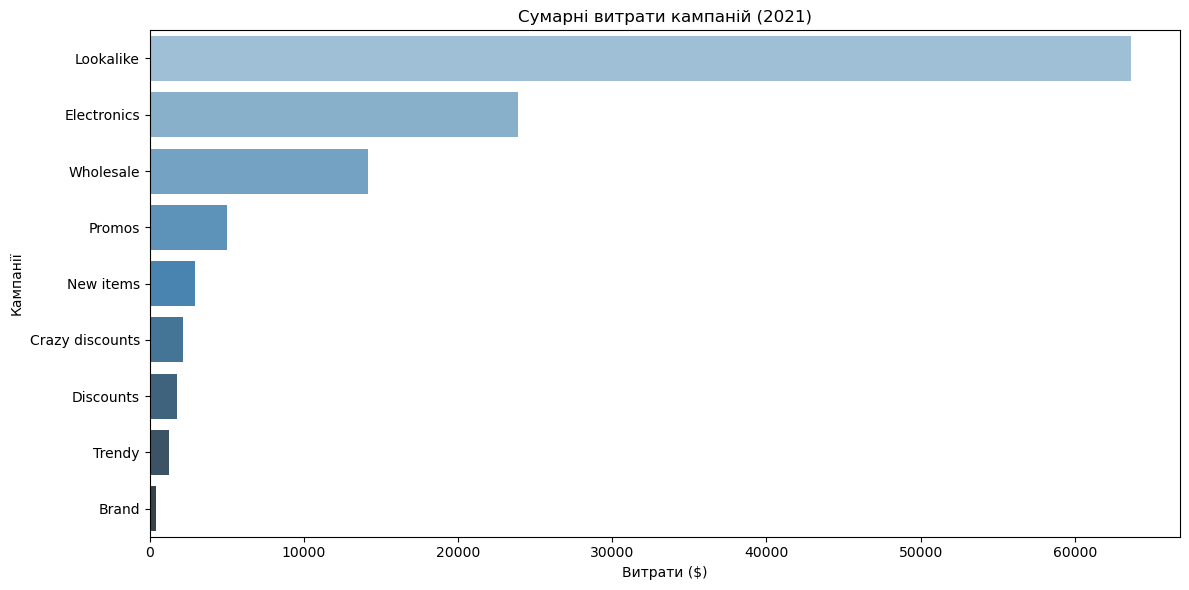

In [32]:
spend_by_campaign = df_2021.groupby("campaign_name")["total_spend"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=spend_by_campaign.values, y=spend_by_campaign.index, palette="Blues_d")
plt.title("Сумарні витрати кампаній (2021)")
plt.xlabel("Витрати ($)")
plt.ylabel("Кампанії")
plt.tight_layout()
plt.show()

/var/folders/t2/1gfghcq52p70wb1hs0l_jszr0000gn/T/ipykernel_1332/1942499833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_romi_by_campaign.values, y=avg_romi_by_campaign.index, palette="Greens_d")


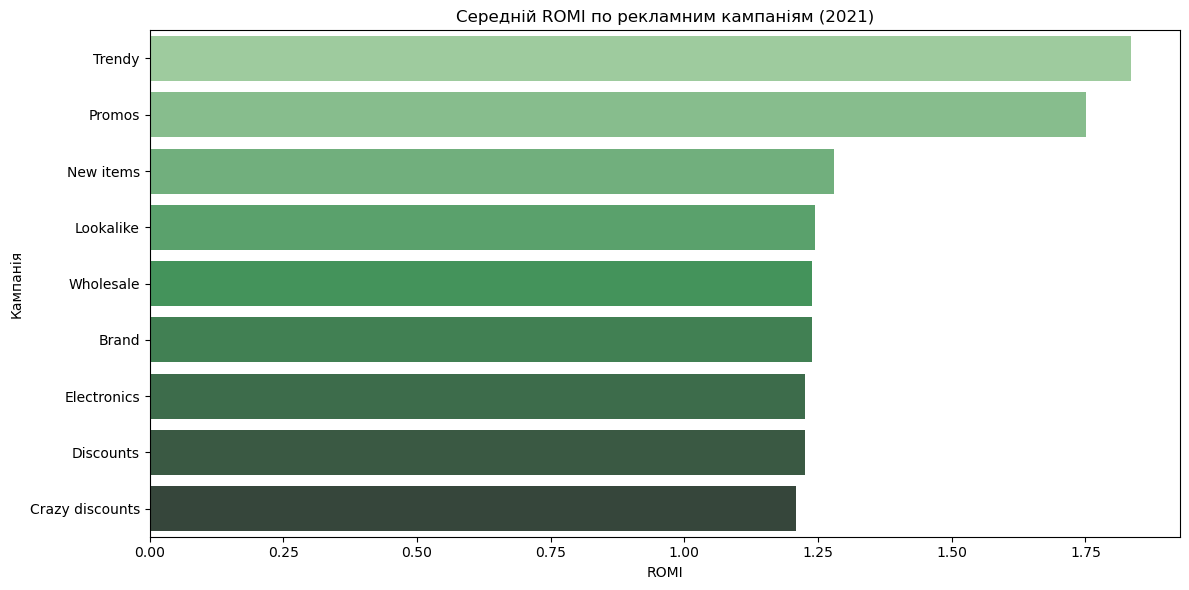

In [36]:
avg_romi_by_campaign = df_2021.groupby("campaign_name")["romi"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_romi_by_campaign.values, y=avg_romi_by_campaign.index, palette="Greens_d")
plt.title("Середній ROMI по рекламним кампаніям (2021)")
plt.xlabel("ROMI")
plt.ylabel("Кампанія")
plt.tight_layout()
plt.show()

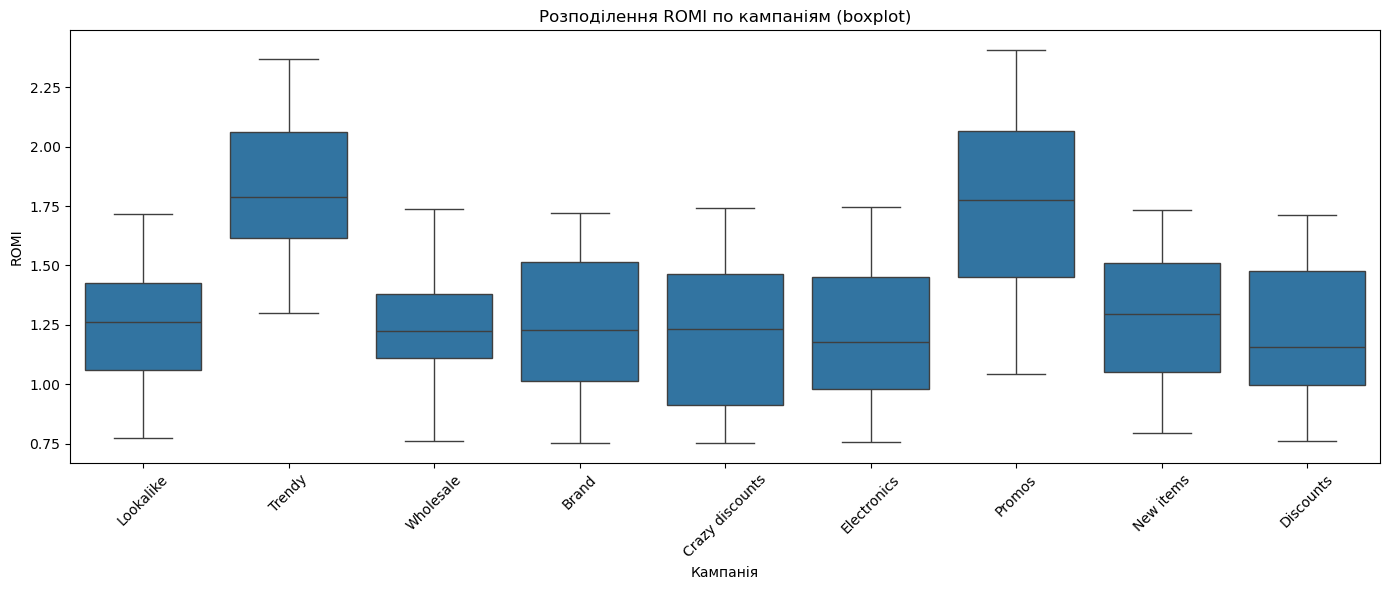

In [40]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_2021, x="campaign_name", y="romi")
plt.title("Розподілення ROMI по кампаніям (boxplot)")
plt.xlabel("Кампанія")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

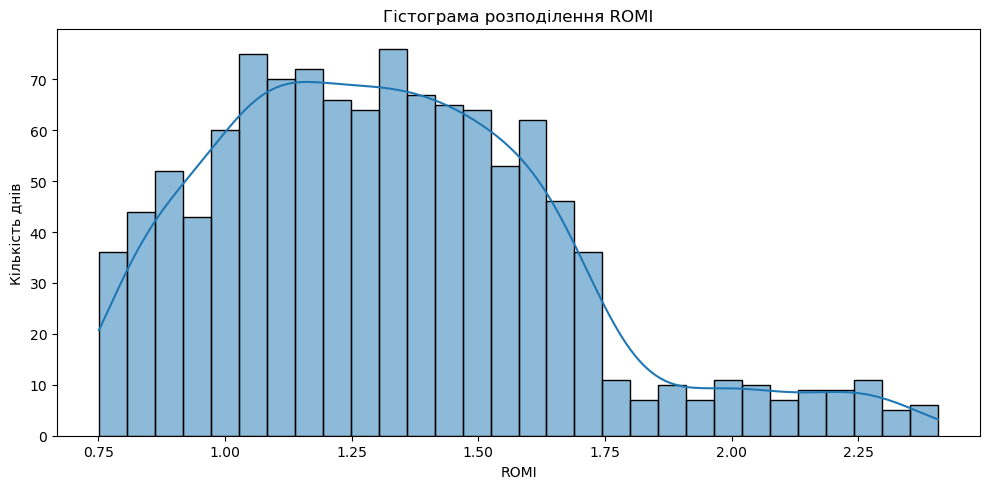

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_2021, x="romi", bins=30, kde=True)
plt.title("Гістограма розподілення ROMI")
plt.xlabel("ROMI")
plt.ylabel("Кількість днів")
plt.tight_layout()
plt.show()

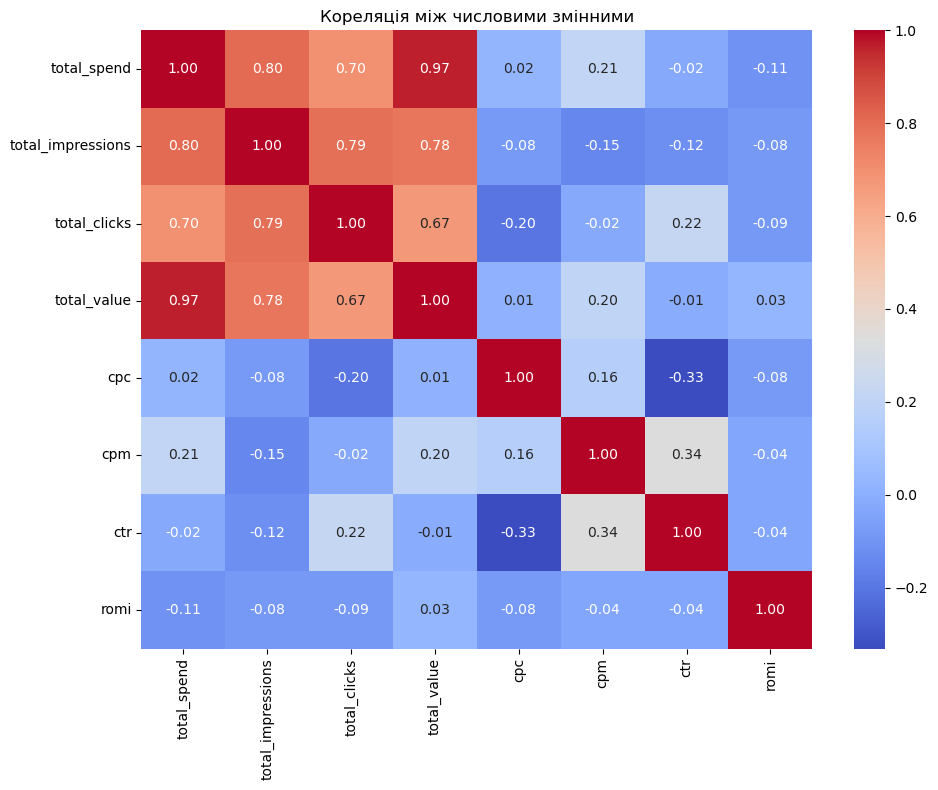

In [52]:
numeric_df = df_2021.select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляція між числовими змінними")
plt.tight_layout()
plt.show()

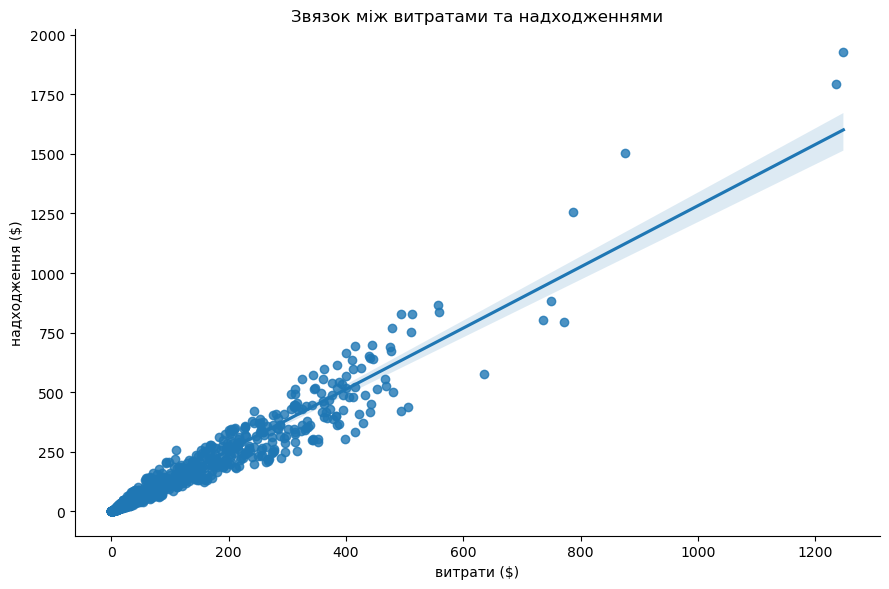

In [58]:
sns.lmplot(data=df_2021, x="total_spend", y="total_value", height=6, aspect=1.5)
plt.title("Звязок між витратами та надходженнями")
plt.xlabel("витрати ($)")
plt.ylabel("надходження ($)")
plt.tight_layout()
plt.show()